In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

In [83]:
iris = sns.load_dataset('iris')
df = iris

In [84]:
before = np.array(df.iloc[:,-1])
y = LabelEncoder().fit_transform(before)

In [85]:
x = df.iloc[:,:-1]

In [86]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, shuffle=True, random_state=42)

In [87]:
# bydefault - post prunning
treemodel = DecisionTreeClassifier(criterion="gini")
treemodel.fit(x_train, y_train)

DecisionTreeClassifier()

[Text(0.5416666666666666, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.625, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.3333333333333333, 0.5, 'x[3] <= 1.65\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[2] <= 4.95\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.25, 0.21428571428571427, 'x[3] <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.16666666666666666, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3333333333333333, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 

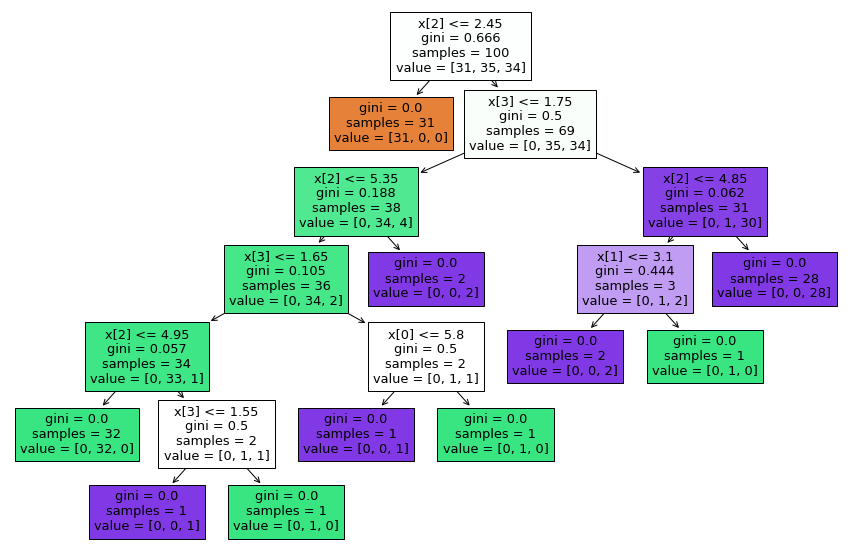

In [88]:
plt.figure(figsize=(15,10))
plot_tree(treemodel, filled=True)

In [89]:
y_pred = treemodel.predict(x_test)

In [91]:
#check accuracy
score = accuracy_score(y_pred, y_test)
print(classification_report(y_pred, y_test))
print(score)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

1.0


In [102]:
# pre-prunning
parameters = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['random', 'best'],
    'max_depth': [1,2,3,4,5],
    'max_features': ['auto', 'sqrt','log2'],
}

In [103]:
treemodel = DecisionTreeClassifier()
cv = GridSearchCV(treemodel, param_grid=parameters, cv=5, scoring='accuracy')

In [105]:
cv.fit(x_train, y_train)

c:\Users\jayde\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\jayde\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\jayde\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\jayde\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['random', 'best']},
             scoring='accuracy')

In [106]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [108]:
y_pred = cv.predict(x_test)

In [111]:
#check accuracy
score = accuracy_score(y_pred, y_test)
print(classification_report(y_pred, y_test))
print("Score:", score)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.83      0.91        18
           2       0.94      1.00      0.97        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50

Score: 0.94
